## 구글 드라이브 마운트

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/BigContest')

Mounted at /content/drive


## 라이브러리

In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-e6f8c91ad64c>", line 1, in <cell line: 1>
    import pandas as pd
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-e6f8c91ad64c>", line 1, in <cell line: 1>
    import pandas as pd
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback


## 데이터 불러오기

In [ ]:
data = pd.read_csv('data/final_model_data.csv').drop(columns = 'Unnamed: 0')
data

,origin,dest,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,median_time,predict_time,max_distance,median_distance,max_transit_methods,num_transfer,median_last_walk,avg_last_walk,isFestival,isWeekend
0,S,D,20230902,12,16,1,0,0,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
1,S,D,20230902,12,16,1,0,0,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
2,S,D,20230902,12,16,1,0,0,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
3,S,D,20230902,12,16,1,0,0,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
4,S,D,20230902,12,16,1,0,0,0.0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940988,G,GB,20231015,21,22,1,2,0,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940989,G,GB,20231015,21,22,1,2,0,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940990,G,GB,20231015,21,22,1,2,0,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True
3940991,G,GB,20231015,21,22,1,2,0,5.0,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,True,True


In [ ]:
data = data[data.model != 0]

## 결측치 확인

In [ ]:
data.isna().sum()

,0
origin,0
dest,0
date,0
start_time,0
end_time,0
gender,0
age,0
modal,0
origin_purpose,0
dest_purpose,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940993 entries, 0 to 3940992
Data columns (total 25 columns):
 #   Column               Dtype  
---  ------               -----  
 0   origin               object 
 1   dest                 object 
 2   date                 int64  
 3   start_time           int64  
 4   end_time             int64  
 5   gender               int64  
 6   age                  int64  
 7   modal                int64  
 8   origin_purpose       float64
 9   dest_purpose         int64  
 10  od_dist_avg          float64
 11  od_duration_avg      float64
 12  max_time             float64
 13  min_time             float64
 14  num_transit_methods  float64
 15  median_time          float64
 16  predict_time         float64
 17  max_distance         float64
 18  median_distance      float64
 19  max_transit_methods  float64
 20  num_transfer         float64
 21  median_last_walk     float64
 22  avg_last_walk        float64
 23  isFestival           bool   
 24

## 전처리

In [ ]:
data['median_last_walk'] = data.median_last_walk * 60
data['avg_last_walk'] = data.avg_last_walk * 60

In [ ]:
# 컬럼을 숫자 형태(num)와 범주형(category)로 나누기
num_features = ['start_time', 'end_time', 'age', 'od_dist_avg', 'od_duration_avg', 'max_time', 'min_time', 'num_transit_methods', 'predict_time', 'max_distance',
                'median_distance', 'max_transit_methods', 'num_transfer', 'median_last_walk', 'avg_last_walk']
cat_features = ['origin', 'dest', 'gender', 'modal', 'origin_purpose', 'dest_purpose', 'isFestival', 'isWeekend']

In [ ]:
# 범주형 변수를 float -> int -> category로 변환
data[['modal', 'origin_purpose', 'dest_purpose']] = data[['modal', 'origin_purpose', 'dest_purpose']].astype('int').astype('category')
data[['origin', 'dest']] = data[['origin', 'dest']].astype('category')
data['gender'] = data.gender.astype('bool')

In [ ]:
# label encoding
for col in cat_features:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])
  le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
  print(col, le_name_mapping)

origin {'B': 0, 'D': 1, 'G': 2, 'I': 3, 'S': 4}
dest {'B': 0, 'D': 1, 'GA': 2, 'GB': 3, 'I': 4, 'S': 5}
gender {False: 0, True: 1}
modal {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 7: 6}
origin_purpose {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
dest_purpose {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
isFestival {False: 0, True: 1}
isWeekend {False: 0, True: 1}


In [ ]:
data

,origin,dest,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,...,median_time,predict_time,max_distance,median_distance,max_transit_methods,num_transfer,median_last_walk,avg_last_walk,isFestival,isWeekend
0,4,1,20230902,12,16,1,0,0,0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,0,1
1,4,1,20230902,12,16,1,0,0,0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,0,1
2,4,1,20230902,12,16,1,0,0,0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,0,1
3,4,1,20230902,12,16,1,0,0,0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,0,1
4,4,1,20230902,12,16,1,0,0,0,5,...,9568.0,205.338710,154480.0,152219.0,3.0,4.201835,4.15,4.150000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940988,2,3,20231015,21,22,1,2,0,5,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,1,1
3940989,2,3,20231015,21,22,1,2,0,5,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,1,1
3940990,2,3,20231015,21,22,1,2,0,5,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,1,1
3940991,2,3,20231015,21,22,1,2,0,5,5,...,2155.0,223.325581,31749.0,7296.0,2.0,3.037209,3.10,4.083333,1,1


In [ ]:
data.columns

Index(['origin', 'dest', 'date', 'start_time', 'end_time', 'gender', 'age',
       'modal', 'origin_purpose', 'dest_purpose', 'od_dist_avg',
       'od_duration_avg', 'max_time', 'min_time', 'num_transit_methods',
       'median_time', 'predict_time', 'max_distance', 'median_distance',
       'max_transit_methods', 'num_transfer', 'median_last_walk',
       'avg_last_walk', 'isFestival', 'isWeekend'],
      dtype='object')

In [ ]:
# 데이터 분할: X(독립변수), y(종속변수)
using_features = ['origin', 'dest', 'date', 'start_time', 'end_time', 'gender', 'age',
       'modal', 'origin_purpose', 'dest_purpose', 'od_dist_avg',
       'od_duration_avg', 'max_time', 'min_time', 'num_transit_methods',
       'median_time', 'predict_time', 'max_distance', 'median_distance',
       'max_transit_methods', 'num_transfer', 'median_last_walk',
       'avg_last_walk', 'isFestival', 'isWeekend']
# using_features = ['od_dist_avg', 'od_duration_avg', 'start_time', 'age', 'origin', 'dest', 'dest_purpose', 'modal']
X_data = data[using_features].drop(columns = 'modal')
y_data = data.modal

In [ ]:
# One-Hot encoding
data = pd.get_dummies(data, columns = ['gender', 'dest_purpose', 'origin', 'dest'])

## 클러스터링

In [ ]:
data.목적지.unique()

array(['D', 'B', 'GA', 'GB', 'I', 'S'], dtype=object)

In [ ]:
data_D = data[data.목적지 == 'D']
data_B = data[data.목적지 == 'B']
data_GA = data[data.목적지 == 'GA']
data_GB = data[data.목적지 == 'GB']
data_I = data[data.목적지 == 'I']
data_S = data[data.목적지 == 'S']

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123622 files and direc

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

### 대전

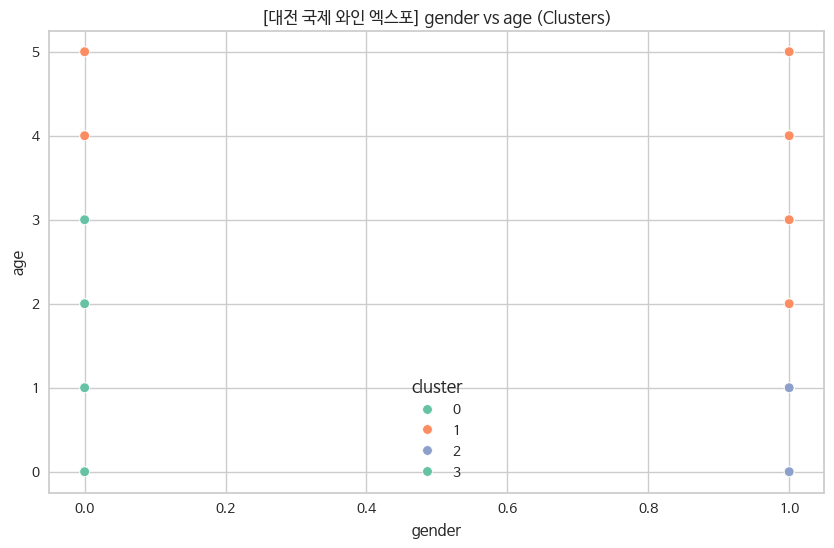

          od_dist_avg  od_duration_avg    gender       age
cluster                                                   
0         9407.351918        18.639898  0.000000  0.367263
1        10441.458833        17.414069  0.848921  3.518785
2         9153.779412        17.565359  1.000000  0.124183
3        52727.557377        85.043716  0.557377  0.546448


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data_D[['od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

cluster_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=3)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'[대전 국제 와인 엑스포] {x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(cluster_data, 'gender', 'age', 'cluster')

cluster_summary = cluster_data.groupby('cluster').mean()
print(cluster_summary)

In [ ]:
cluster_data.cluster.value_counts()

,count
cluster,
0,1955
1,1251
2,1224
3,183


### 부산

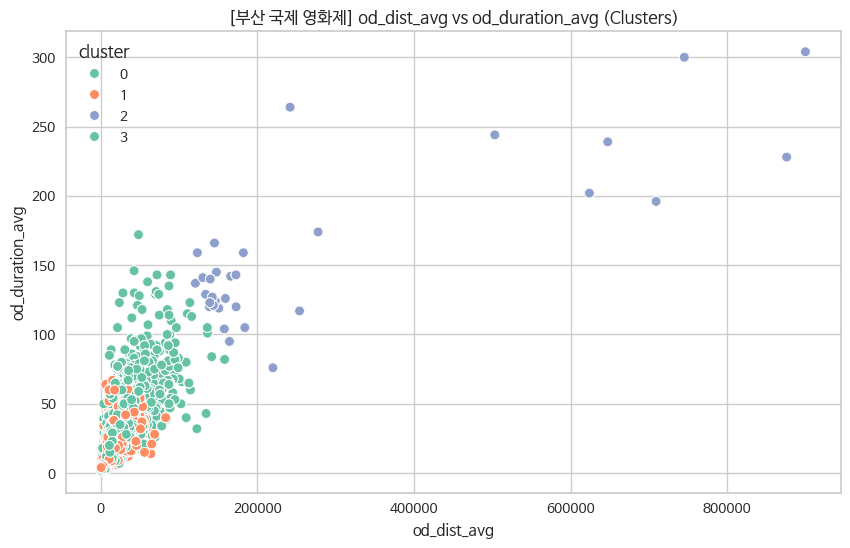

           od_dist_avg  od_duration_avg    gender       age
cluster                                                    
0         50420.610479        67.852096  0.698802  1.421557
1         19476.259650        25.930777  0.000000  1.447118
2        238106.994709       149.679894  0.505291  1.497354
3         19212.352840        23.919331  1.000000  2.045592


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data_B[['od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

cluster_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=3)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'[부산 국제 영화제] {x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(cluster_data, 'od_dist_avg', 'od_duration_avg', 'cluster')

cluster_summary = cluster_data.groupby('cluster').mean()
print(cluster_summary)

In [ ]:
df = cluster_data.cluster.value_counts().reset_index()
df['percentage'] = df['count'] / df['count'].sum() * 100
df

,cluster,count,percentage
0,3,23206,50.659273
1,1,15544,33.932937
2,0,6680,14.582606
3,2,378,0.825183


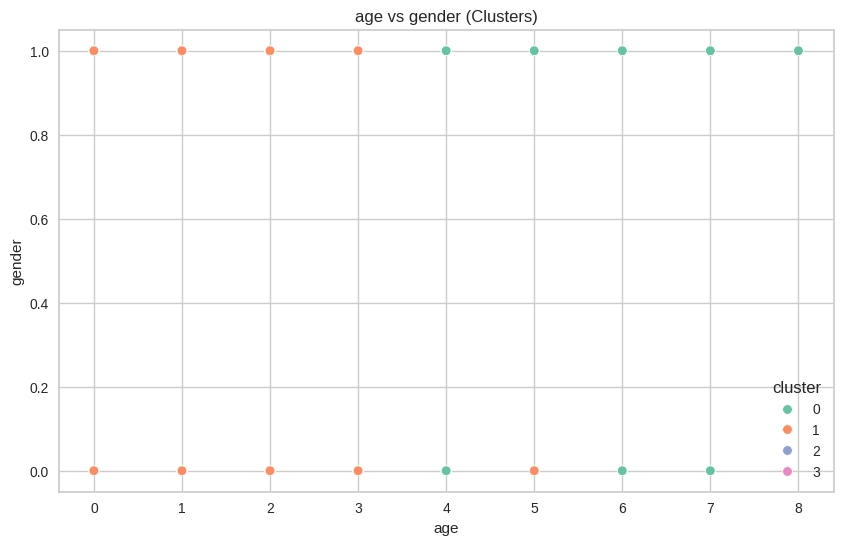

,목적지,od_dist_avg,od_duration_avg,gender,age,목적지_encoded,cluster
0,D,9765.0,15.0,0.0,1.0,1,2
1,D,9765.0,15.0,0.0,1.0,1,2
2,D,9765.0,15.0,0.0,1.0,1,2
3,D,9765.0,15.0,0.0,1.0,1,2
4,D,9765.0,15.0,0.0,1.0,1,2
...,...,...,...,...,...,...,...
92309,S,93855.0,117.0,0.0,2.0,5,1
92310,S,93855.0,117.0,0.0,2.0,5,1
92311,S,93855.0,117.0,0.0,2.0,5,1
92312,S,93855.0,117.0,0.0,2.0,5,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data[['목적지', 'od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()


label_encoder = LabelEncoder()
cluster_data['목적지_encoded'] = label_encoder.fit_transform(cluster_data['목적지'])
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
mapping_dict = le_name_mapping
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data[['목적지_encoded', 'od_dist_avg', 'od_duration_avg', 'gender', 'age']])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

cluster_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=4)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'{x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(cluster_data, 'age', 'gender', 'cluster')
cluster_data
# cluster_summary = cluster_data.groupby('cluster').mean()
# print(cluster_summary)


In [ ]:
cluster_data

,목적지,od_dist_avg,od_duration_avg,gender,age,목적지_encoded,cluster
0,D,9765.0,15.0,0.0,1.0,1,2
1,D,9765.0,15.0,0.0,1.0,1,2
2,D,9765.0,15.0,0.0,1.0,1,2
3,D,9765.0,15.0,0.0,1.0,1,2
4,D,9765.0,15.0,0.0,1.0,1,2
...,...,...,...,...,...,...,...
92309,S,93855.0,117.0,0.0,2.0,5,1
92310,S,93855.0,117.0,0.0,2.0,5,1
92311,S,93855.0,117.0,0.0,2.0,5,1
92312,S,93855.0,117.0,0.0,2.0,5,1


In [ ]:
cluster_data.groupby(['목적지','cluster'])[['gender', 'age']].value_counts().reset_index()

,목적지,cluster,gender,age,count
0,B,0,1.0,2.0,8228
1,B,0,1.0,3.0,7582
2,B,0,1.0,4.0,2244
3,B,0,1.0,1.0,1362
4,B,0,0.0,4.0,784
...,...,...,...,...,...
134,S,2,0.0,1.0,36
135,S,2,0.0,3.0,20
136,S,3,0.0,0.0,104
137,S,3,0.0,1.0,44


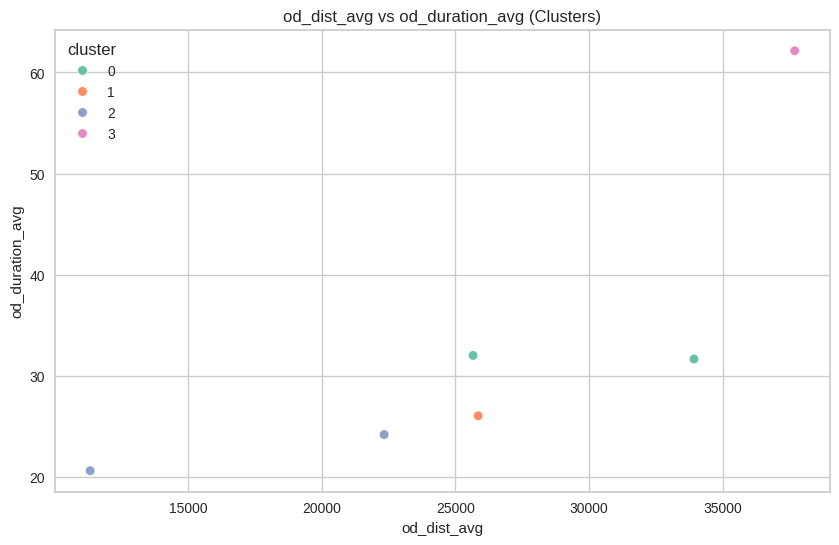

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data[['목적지', 'od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()

grouped_data = cluster_data.groupby('목적지').mean().reset_index()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data[['od_dist_avg', 'od_duration_avg', 'gender', 'age']])

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

grouped_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=4)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'{x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(grouped_data, 'od_dist_avg', 'od_duration_avg', 'cluster')

cluster_summary = grouped_data.groupby('cluster').mean()
print(cluster_summary)

### 강릉(스피드 스케이팅 경기장)

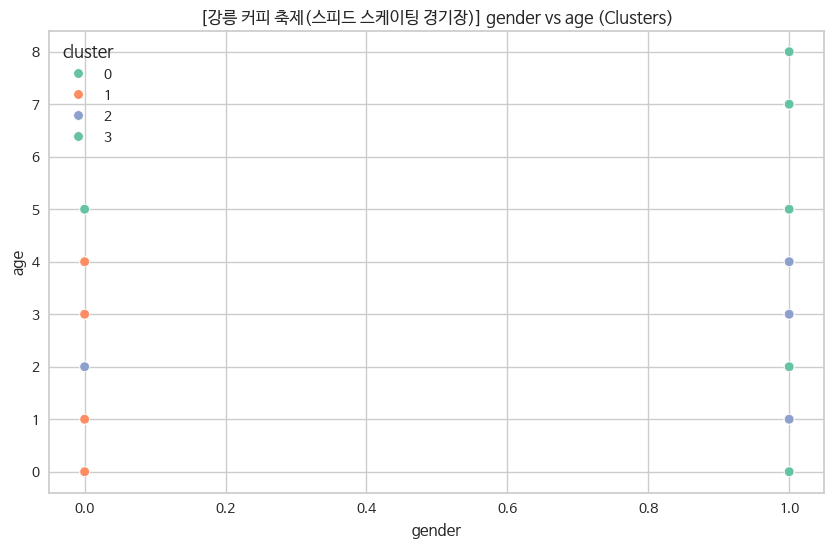

           od_dist_avg  od_duration_avg    gender       age
cluster                                                    
0         20995.061076        26.277119  0.980857  3.644257
1         21023.276372        24.560140  0.000000  1.404048
2        250220.056751       137.823875  0.741683  2.385519
3         17544.863816        22.060174  1.000000  0.592241


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data_GA[['od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

cluster_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=3)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'[강릉 커피 축제(스피드 스케이팅 경기장)] {x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(cluster_data, 'gender', 'age', 'cluster')

cluster_summary = cluster_data.groupby('cluster').mean()
print(cluster_summary)

In [ ]:
df = cluster_data.cluster.value_counts().reset_index()
df['percentage'] = df['count'] / df['count'].sum() * 100
df

,cluster,count,percentage
0,0,4388,50.257702
1,1,2569,29.423892
2,3,1263,14.465697
3,2,511,5.852709


### 강릉 B

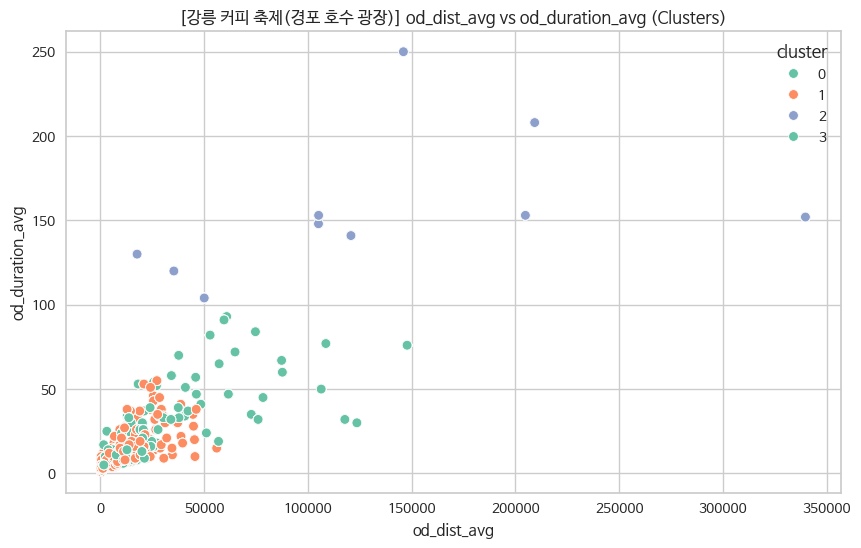

          od_dist_avg  od_duration_avg    gender       age
cluster                                                   
0        14220.171393        16.229346  0.861899  3.540074
1        14945.161290        15.785640  0.081165  1.159729
2        93778.489510       141.342657  0.132867  0.342657
3        76498.133333        54.758974  0.271795  1.076923


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data_GB[['od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

cluster_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=3)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'[강릉 커피 축제(경포 호수 광장)] {x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(cluster_data, 'od_dist_avg', 'od_duration_avg', 'cluster')

cluster_summary = cluster_data.groupby('cluster').mean()
print(cluster_summary)

In [ ]:
df = cluster_data.cluster.value_counts().reset_index()
df['percentage'] = df['count'] / df['count'].sum() * 100
df

,cluster,count,percentage
0,1,1922,62.585477
1,0,811,26.408336
2,3,195,6.349723
3,2,143,4.656464


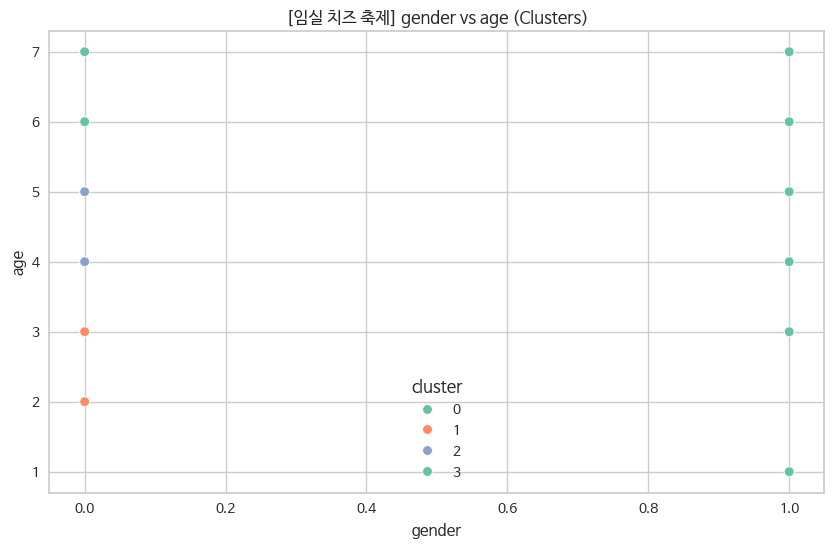

           od_dist_avg  od_duration_avg    gender       age
cluster                                                    
0          8789.539474        10.596491  1.000000  3.206140
1        115594.574074       102.671296  0.074074  2.805556
2         16344.046070        16.868564  0.000000  3.467480
3          8066.943396        13.048218  0.880503  5.700210


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data_I[['od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

cluster_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=3)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'[임실 치즈 축제] {x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(cluster_data, 'gender', 'age', 'cluster')

cluster_summary = cluster_data.groupby('cluster').mean()
print(cluster_summary)

In [ ]:
df = cluster_data.cluster.value_counts().reset_index()
df['percentage'] = df['count'] / df['count'].sum() * 100
df

,cluster,count,percentage
0,2,738,44.484629
1,3,477,28.752260
2,0,228,13.743219
3,1,216,13.019892


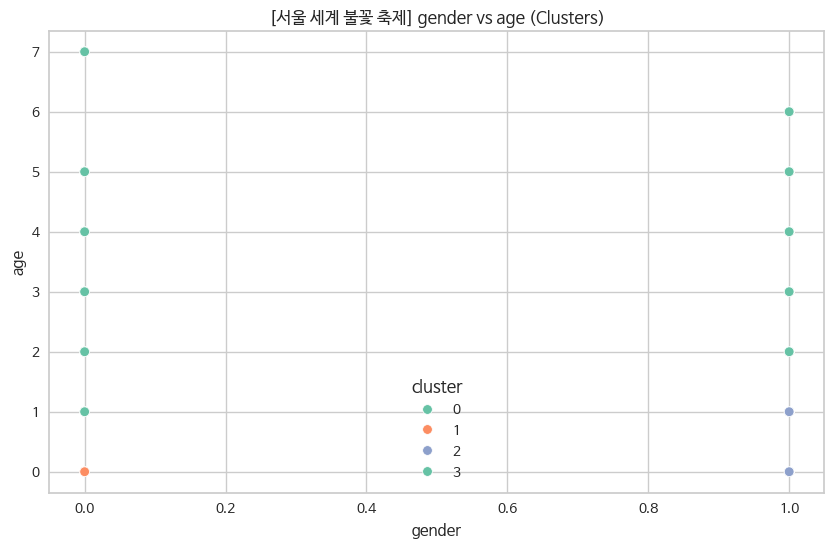

          od_dist_avg  od_duration_avg    gender       age
cluster                                                   
0        87964.309815       107.817277  0.335595  0.744912
1        27530.643301        53.283883  0.000000  0.719612
2        27117.597299        55.352004  1.000000  0.301749
3        32919.630453        51.571429  0.897776  2.795124


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

cluster_data = data_S[['od_dist_avg', 'od_duration_avg', 'gender', 'age']].dropna()


scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

cluster_data['cluster'] = kmeans.labels_

palette = sns.color_palette('Set2', n_colors=3)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'[서울 세계 불꽃 축제] {x_col} vs {y_col} (Clusters)')
    plt.show()

plot_clusters(cluster_data, 'gender', 'age',  'cluster')

cluster_summary = cluster_data.groupby('cluster').mean()
print(cluster_summary)

In [ ]:
df = cluster_data.cluster.value_counts().reset_index()
df['percentage'] = df['count'] / df['count'].sum() * 100
df

,cluster,count,percentage
0,1,10300,36.226787
1,2,9034,31.774057
2,3,4676,16.446258
3,0,4422,15.552898


## 계층적 군집화

In [ ]:
data_D

,출발지,목적지,start_time,gender,age,dest_purpose,od_dist_avg,od_duration_avg,modal,min_time,...,median_time,예상 배차시간,최대 이동거리,최소 이동거리,이동거리 중간값,최대 교통수단 수,환승횟수,마지막 도보시간 중간값,마지막 도보시간 평균,cluster
0,D,D,12,0.0,1.0,5,9765.0,15.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,0
1,D,D,12,0.0,1.0,5,9765.0,15.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,0
2,D,D,12,0.0,1.0,5,9765.0,15.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,0
3,D,D,12,0.0,1.0,5,9765.0,15.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,0
4,D,D,12,0.0,1.0,5,9765.0,15.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4608,D,D,14,1.0,4.0,3,8791.0,19.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,2
4609,D,D,14,1.0,4.0,3,8791.0,19.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,2
4610,D,D,14,1.0,4.0,3,8791.0,19.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,2
4611,D,D,14,1.0,4.0,3,8791.0,19.0,1.0,1958.0,...,2387.0,210.227273,15483,8619,10496.0,2,2.958904,3.841667,5.05,2


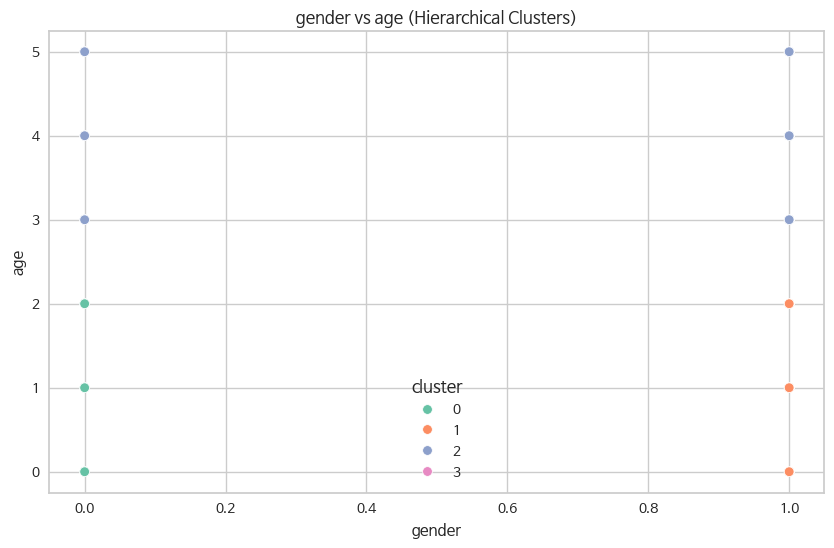

          od_dist_avg  od_duration_avg    gender       age
cluster                                                   
0        10581.509524        20.545503  0.041799  0.246561
1         9107.739535        17.429457  1.000000  0.220155
2        10124.379389        16.879389  0.745802  3.528244
3        59317.341463        96.439024  0.341463  0.000000


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_D[['od_dist_avg', 'od_duration_avg', 'gender', 'age']])

agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
data_D['cluster'] = agg_clustering.fit_predict(scaled_data)


palette = sns.color_palette('Set2', n_colors=4)

def plot_clusters(data, x_col, y_col, cluster_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, palette=palette, data=data)
    plt.title(f'{x_col} vs {y_col} (Hierarchical Clusters)')
    plt.show()

plot_clusters(data_D, 'gender', 'age', 'cluster')


cluster_summary = data_D[['od_dist_avg', 'od_duration_avg', 'gender', 'age', 'cluster']].groupby('cluster').mean()
print(cluster_summary)


## Pycaret

In [ ]:
from pycaret.datasets import get_data
from pycaret.clustering import *
exp_name = setup(data = data)
kmeans = create_model('kmeans')
plot_model(kmeans, plot = 'cluster')

In [ ]:
# train, test 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4, random_state = 42, shuffle = True)

# standard scaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Label Encoding 적용 (y_train과 y_test에 대해)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

y_test_encoded = encoder.transform(y_test)
train_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_data['modal'] = y_train_encoded

In [ ]:
from pycaret.datasets import get_data
from pycaret.clustering import *

In [ ]:
exp = ClusteringExperiment()

In [ ]:
exp_name = setup(data = X_train)
kmeans = create_model('kmeans')


,Description,Value
0,Session id,8866
1,Original data shape,"(55388, 17)"
2,Transformed data shape,"(55388, 17)"
3,Numeric features,17
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5632,57210.3528,0.6458,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
plot_model(kmeans, plot = 'cluster')

KeyError: 'modal'

In [ ]:
plot_model(kmeans, plot = 'tsne', feature = 'age')

KeyboardInterrupt: 

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,od_dist_avg,od_duration_avg,start_time,age,origin,dest,dest_purpose,Cluster
84073,49347.0,63.0,11,0.0,4,5,2,Cluster 0
49413,23322.0,53.0,16,3.0,4,5,1,Cluster 1
999,16283.0,16.0,9,0.0,1,1,1,Cluster 1
28276,42006.0,20.0,8,1.0,2,2,1,Cluster 0
90694,14394.0,75.0,14,0.0,4,5,0,Cluster 1
...,...,...,...,...,...,...,...,...
6265,29532.0,26.0,12,1.0,0,0,0,Cluster 1
54886,27396.0,79.0,13,1.0,4,5,1,Cluster 1
76820,10595.0,13.0,10,3.0,0,0,0,Cluster 1
860,13642.0,26.0,11,3.0,1,1,1,Cluster 1


In [ ]:
kmeans_cluster[kmeans_cluster.Cluster == 'Cluster 0'].describe()

,od_dist_avg,od_duration_avg,start_time,age,origin,dest,dest_purpose
count,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000,13752.000000
mean,52062.195312,67.584930,14.168121,1.544648,2.176047,2.702225,1.088787
std,15983.246094,28.978493,3.000125,1.243481,1.904238,2.388730,0.765530
min,34235.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,39512.000000,47.000000,12.000000,0.000000,0.000000,0.000000,0.000000
50%,47254.000000,64.000000,15.000000,2.000000,3.000000,4.000000,1.000000
75%,60413.000000,86.000000,17.000000,2.000000,4.000000,5.000000,2.000000
max,102482.000000,186.000000,23.000000,7.000000,4.000000,5.000000,2.000000


In [ ]:
kmeans_cluster[kmeans_cluster.Cluster == 'Cluster 1'].describe()

,od_dist_avg,od_duration_avg,start_time,age,origin,dest,dest_purpose
count,40280.000000,40280.000000,40280.000000,40280.000000,40280.000000,40280.000000,40280.000000
mean,16290.591797,28.920656,13.511097,1.590814,1.368843,1.667378,0.856852
std,8992.099609,20.401651,3.361482,1.560539,1.671419,2.094526,0.783444
min,115.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,9611.000000,14.000000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,15943.000000,23.000000,14.000000,1.000000,0.000000,0.000000,1.000000
75%,23011.750000,40.000000,16.000000,3.000000,3.000000,4.000000,1.000000
max,34224.000000,167.000000,23.000000,8.000000,4.000000,5.000000,2.000000


In [ ]:
kmeans_cluster[kmeans_cluster.Cluster == 'Cluster 2'].describe()

,od_dist_avg,od_duration_avg,start_time,age,origin,dest,dest_purpose
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,153865.390625,105.556572,13.695507,1.376040,2.373544,2.891847,1.136439
std,49333.621094,40.717381,2.566445,1.304577,1.617782,2.059470,0.686266
min,103289.000000,22.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,119099.000000,75.250000,12.000000,0.000000,0.000000,0.000000,1.000000
50%,141442.000000,106.000000,14.000000,1.000000,2.000000,3.000000,1.000000
75%,172707.000000,133.000000,16.000000,3.000000,4.000000,5.000000,2.000000
max,321599.000000,264.000000,20.000000,4.000000,4.000000,5.000000,2.000000


In [ ]:
kmeans_cluster[kmeans_cluster.Cluster == 'Cluster 3'].describe()

,od_dist_avg,od_duration_avg,start_time,age,origin,dest,dest_purpose
count,154.000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,497733.625,165.727280,13.077922,1.876623,3.350649,2.201299,1.532468
std,157014.250,59.061653,2.529648,1.634306,0.925545,1.565059,0.638307
min,331600.000,84.000000,9.000000,0.000000,2.000000,0.000000,0.000000
25%,362352.000,122.000000,11.000000,0.000000,2.000000,2.000000,1.000000
50%,427449.000,145.000000,13.000000,2.000000,4.000000,2.000000,2.000000
75%,607527.500,202.000000,15.000000,3.000000,4.000000,2.000000,2.000000
max,900019.000,304.000000,19.000000,4.000000,4.000000,5.000000,2.000000


In [ ]:
col = X_data.columns

# train, test 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.4, random_state = 42, shuffle = True)

# standard scaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Label Encoding 적용 (y_train과 y_test에 대해)
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
train_data = pd.DataFrame(X_train_scaled, columns=X_train.columns)
train_data['modal'] = y_train_encoded
#
#train_data = train_data.reset_index()

# setup
exp = setup(data = train_data, target = 'modal', remove_multicollinearity = 0.8)

,Description,Value
0,Session id,3360
1,Target,modal
2,Target type,Multiclass
3,Original data shape,"(2364595, 25)"
4,Transformed data shape,"(2364595, 21)"
5,Transformed train set shape,"(1655216, 21)"
6,Transformed test set shape,"(709379, 21)"
7,Numeric features,24
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# 모델 비교
# best_model = compare_models(sort = 'F1')
# 성능이 가장 좋은 알고리즘으로 모델 생성
# model = create_model(best_model)
model = create_model('rf')
# 모델 생성 마무리
final_model = finalize_model(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:26:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
save_model(final_model, 'rf_1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['origin', 'dest', 'date',
                                              'start_time', 'end_time', 'gender',
                                              'age', 'origin_purpose',
                                              'dest_purpose', 'od_dist_avg',
                                              'od_duration_avg', 'max_time',
                                              'min_time', 'num_transit_methods',
                                              'median_time', 'predict_time',
                                              'max_distance', 'median_distance',
                                              'max_transi...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         

In [ ]:
data.modal.value_counts()

0    2893602
1     617876
2     288267
4     112970
3      25834
5       2146
6        298
Name: modal, dtype: int64

In [ ]:
y_pred = predict_model(final_model, data = X_test_scaled.reset_index())
f1_Score = f1_score(y_test, y_pred['prediction_label'], average = 'micro')
print(f"F1-score: {f1_Score}")

F1-score: 0.9971022546336649


In [ ]:
X_test_B = X_test[X_test.dest == 0]
X_test_D = X_test[X_test.dest == 1]
X_test_GA = X_test[X_test.dest == 2]
X_test_GB = X_test[X_test.dest == 3]
X_test_I = X_test[X_test.dest == 4]
X_test_S = X_test[X_test.dest == 5]

In [ ]:
y_pred_B = predict_model(final_model, data = X_test_B.reset_index())
y_pred_B.prediction_label.value_counts()

,count
prediction_label,
0,18261
4,21


In [ ]:
y_pred_D = predict_model(final_model, data = X_test_D.reset_index())
y_pred_D.prediction_label.value_counts()

,count
prediction_label,
0,1840


In [ ]:
y_pred_GA = predict_model(final_model, data = X_test_GA.reset_index())
y_pred_GA.prediction_label.value_counts()

,count
prediction_label,
0,3496
1,73


In [ ]:
y_pred_GB = predict_model(final_model, data = X_test_GB.reset_index())
y_pred_GB.prediction_label.value_counts()

,count
prediction_label,
0,1241
1,36


In [ ]:
y_pred_I = predict_model(final_model, data = X_test_I.reset_index())
y_pred_I.prediction_label.value_counts()

,count
prediction_label,
0,653


In [ ]:
y_pred_S = predict_model(final_model, data = X_test_S.reset_index())
y_pred_S.prediction_label.value_counts()

,count
prediction_label,
0,9718
1,1587


In [ ]:
get_leaderboard(final_model)

Processing:   0%|          | 0/35 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapper(exclude=None,\n ...",0.7194,0.0000,0.7194,0.7086,0.6934,0.4572,0.4714
1,K Neighbors Classifier,"(TransformerWrapper(exclude=None,\n ...",0.7454,0.1658,0.7454,0.7299,0.7280,0.5246,0.5300
2,Naive Bayes,"(TransformerWrapper(exclude=None,\n ...",0.5577,0.1492,0.5577,0.6197,0.5583,0.2671,0.2777
3,Decision Tree Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8330,0.1712,0.8330,0.8332,0.8326,0.7064,0.7067
4,SVM - Linear Kernel,"(TransformerWrapper(exclude=None,\n ...",0.6965,0.0000,0.6965,0.6750,0.6652,0.4062,0.4242
5,Ridge Classifier,"(TransformerWrapper(exclude=None,\n ...",0.6897,0.0000,0.6897,0.6647,0.6533,0.3898,0.4073
6,Random Forest Classifier,"(TransformerWrapper(exclude=None,\n ...",0.8736,0.1880,0.8736,0.8717,0.8703,0.7729,0.7740
7,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,Quadratic Discriminant Analysis,"(TransformerWrapper(exclude=None,\n ...",0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
tuned_model = tune_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7651,0.0000,0.7651,0.7545,0.7538,0.5610,0.5690
1,0.7989,0.0000,0.7989,0.7922,0.7873,0.6233,0.6357
2,0.7687,0.0000,0.7687,0.7616,0.7562,0.5648,0.5772
3,0.7260,0.0000,0.7260,0.7109,0.7108,0.4859,0.4963
4,0.7189,0.0000,0.7189,0.7095,0.7025,0.4649,0.4795
5,0.7367,0.8731,0.7367,0.7220,0.7213,0.5056,0.5163
6,0.7384,0.8507,0.7384,0.7231,0.7254,0.5129,0.5198
7,0.7665,0.0000,0.7665,0.7557,0.7534,0.5613,0.5725
8,0.7273,0.0000,0.7273,0.7141,0.7119,0.4884,0.4999


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

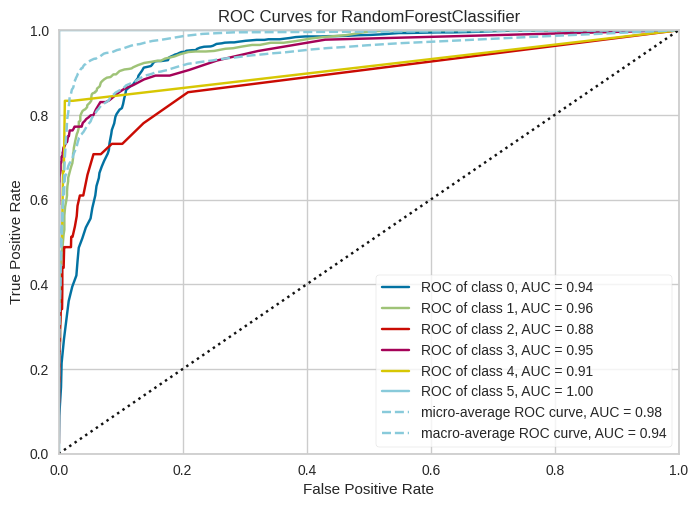

In [ ]:
plot_model(tuned_model)

## 상관관계

In [ ]:
sns.pairplot(data, hue='modal')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
data[num_features].corr()

,start_time,age,od_dist_avg,od_duration_avg,od_cnts,min_time,max_time,num_transit_methods,median_time,pred_dispatch,max_dist,min_dist,median_dist,max_transit,num_transfer,last_walk_median,last_walk_avg
start_time,1.000000,-0.101537,0.019728,0.108381,0.020827,-0.256320,-0.059963,-0.007982,-0.218242,-0.136189,-0.152233,-0.089788,-0.086253,-0.193908,-0.141048,0.163018,-0.100581
age,-0.101537,1.000000,-0.028837,-0.197877,-0.503879,0.017733,0.014962,0.023638,0.020867,0.236460,-0.029488,-0.016904,-0.023946,-0.135639,0.014946,-0.294452,0.246083
od_dist_avg,0.019728,-0.028837,1.000000,0.668866,-0.043033,0.147131,0.382043,0.157101,0.282546,0.025675,0.387120,0.506519,0.508855,-0.040958,0.326391,0.139134,0.048845
od_duration_avg,0.108381,-0.197877,0.668866,1.000000,0.055106,-0.165515,0.103678,-0.012909,-0.086690,-0.231560,0.035136,0.142492,0.150499,-0.101303,0.014132,0.292783,-0.186680
od_cnts,0.020827,-0.503879,-0.043033,0.055106,1.000000,-0.109379,-0.028808,0.015698,-0.092669,-0.193221,-0.037198,-0.028977,-0.024869,-0.013854,-0.059785,0.177948,-0.187115
min_time,-0.256320,0.017733,0.147131,-0.165515,-0.109379,1.000000,0.500596,0.042541,0.958063,0.340919,0.816498,0.694195,0.696299,0.770775,0.665230,-0.039093,0.222668
max_time,-0.059963,0.014962,0.382043,0.103678,-0.028808,0.500596,1.000000,0.239237,0.543945,0.198921,0.641155,0.662599,0.704379,0.215674,0.369642,0.071420,0.161383
num_transit_methods,-0.007982,0.023638,0.157101,-0.012909,0.015698,0.042541,0.239237,1.000000,0.150144,-0.090143,0.416845,0.280222,0.269795,-0.067325,0.435790,-0.087133,-0.164168
median_time,-0.218242,0.020867,0.282546,-0.086690,-0.092669,0.958063,0.543945,0.150144,1.000000,0.331469,0.909628,0.851578,0.846896,0.644788,0.759391,0.028012,0.231984
pred_dispatch,-0.136189,0.236460,0.025675,-0.231560,-0.193221,0.340919,0.198921,-0.090143,0.331469,1.000000,0.038485,0.087284,0.080316,-0.239354,0.052051,-0.455651,0.984742
